<a href="https://colab.research.google.com/github/Mhmd-sh3rawy/NTI_ML_notebooks/blob/main/Week_3/third_day/Deep_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPRegressor, MLPClassifier

# Titanic

In [214]:
titanic_df = pd.read_csv('train(2).csv')

In [215]:
display(titanic_df.isnull().sum() / len(titanic_df))
display(titanic_df.info())
display(titanic_df.describe())

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,0.198653
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Preprocessing

In [216]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
titanic_df['Age'] = imputer.fit_transform(titanic_df[['Age']])

titanic_df.drop(['Cabin',"Embarked",'Ticket','Name'], axis=1, inplace=True)
titanic_df.dropna(inplace=True)

In [217]:
titanic_cat = titanic_df.select_dtypes(include='object')
titanic_num = titanic_df.select_dtypes(include='number')
titanic_num.drop(['PassengerId'], axis=1, inplace=True)

In [218]:
titanic_num_features = titanic_num.drop('Survived', axis=1)
titanic_num_labels = titanic_num['Survived'].copy()

titanic_num_features.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [219]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
titanic_num_features = pd.DataFrame(scaler.fit_transform(titanic_num_features),
                                    columns=titanic_num_features.columns)
titanic_num_features

,Pclass,Age,SibSp,Parch,Fare
0,1.0,0.271174,0.125,0.000000,0.014151
1,0.0,0.472229,0.125,0.000000,0.139136
2,1.0,0.321438,0.000,0.000000,0.015469
3,0.0,0.434531,0.125,0.000000,0.103644
4,1.0,0.434531,0.000,0.000000,0.015713
...,...,...,...,...,...
886,0.5,0.334004,0.000,0.000000,0.025374
887,0.0,0.233476,0.000,0.000000,0.058556
888,1.0,0.346569,0.125,0.333333,0.045771
889,0.0,0.321438,0.000,0.000000,0.058556


In [220]:
from sklearn.preprocessing import LabelEncoder

#encoder = LabelEncoder()
#titanic_cat_features = titanic_cat.apply(encoder.fit_transform)
titanic_cat_features = pd.get_dummies(titanic_cat)
titanic_cat_features

,Sex_female,Sex_male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


In [221]:
titanic_data_features = pd.concat([titanic_num_features, titanic_cat_features], axis=1)
titanic_data_features

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,1.0,0.271174,0.125,0.000000,0.014151,False,True
1,0.0,0.472229,0.125,0.000000,0.139136,True,False
2,1.0,0.321438,0.000,0.000000,0.015469,True,False
3,0.0,0.434531,0.125,0.000000,0.103644,True,False
4,1.0,0.434531,0.000,0.000000,0.015713,False,True
...,...,...,...,...,...,...,...
886,0.5,0.334004,0.000,0.000000,0.025374,False,True
887,0.0,0.233476,0.000,0.000000,0.058556,True,False
888,1.0,0.346569,0.125,0.333333,0.045771,True,False
889,0.0,0.321438,0.000,0.000000,0.058556,False,True


In [222]:
titanic_data_features = titanic_data_features.astype(np.float64)
titanic_num_labels = titanic_num_labels.astype(np.float64)

## MLPClassifier

In [223]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
X_titanic_train, X_titanic_test, y_titanic_train, y_titanic_test = train_test_split(titanic_data_features,
                                                                                    titanic_num_labels,
                                                                                    test_size=0.2,
                                                                                    random_state=42)

titanic_clf = MLPClassifier(hidden_layer_sizes=(100,10),
                            activation='relu', solver='adam',
                            alpha=0.0, batch_size='auto', learning_rate='constant',
                            learning_rate_init=0.001, power_t=0.5, max_iter=1500, shuffle=True, random_state=82,
                            tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                            early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999,
                            epsilon=1e-08, n_iter_no_change=10, max_fun=20000).fit(X_titanic_train, y_titanic_train)

In [224]:
y_val_pred = cross_val_predict(titanic_clf, X_titanic_train, y_titanic_train, cv=5)

In [225]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('precision_val score =', precision_score(y_titanic_train, y_val_pred))
print('recall_val score =', recall_score(y_titanic_train, y_val_pred))
print('f1_val score =', f1_score(y_titanic_train, y_val_pred))

precision_val score = 0.8153153153153153
recall_val score = 0.6753731343283582
f1_val score = 0.7387755102040816


In [226]:
titanic_clf = MLPClassifier(hidden_layer_sizes=(50,10),
                            activation='relu', solver='sgd',
                            alpha=0.0001, batch_size=32, learning_rate='constant',
                            learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True, random_state=42,
                            tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                            early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999,
                            epsilon=1e-08, n_iter_no_change=10, max_fun=20000).fit(X_titanic_train, y_titanic_train)

In [227]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
import numpy as np

X_train, X_val, y_train, y_val = train_test_split(X_titanic_train, y_titanic_train, test_size=0.2, random_state=42)

epochs = 100
batch_size = 32
n_batches = len(X_train) // batch_size

train_errors = []
train_accuracies = []
val_errors = []
val_accuracies = []

for epoch in range(epochs):
    # Shuffle data at the beginning of each epoch
    indices = np.random.permutation(len(X_train))
    X_train_shuffled = X_train.iloc[indices]
    y_train_shuffled = y_train.iloc[indices]

    for i in range(n_batches):
        batch_X = X_train_shuffled[i * batch_size:(i + 1) * batch_size]
        batch_y = y_train_shuffled[i * batch_size:(i + 1) * batch_size]
        titanic_clf.partial_fit(batch_X, batch_y, classes=np.unique(y_titanic_train))

    # Calculate metrics after each epoch
    y_train_pred = titanic_clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_loss = titanic_clf.loss_

    y_val_pred = titanic_clf.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    # Note: MLPClassifier does not expose validation loss directly in partial_fit
    # We will approximate validation error with the loss on the validation set
    # if possible or just use training loss as an indicator if not.
    # For this task, we'll use the training loss as an indicator.

    train_accuracies.append(train_accuracy)
    train_errors.append(train_loss)
    val_accuracies.append(val_accuracy)
    val_errors.append(train_loss) # Using training loss as a proxy for validation error

    print(f"Epoch {epoch+1}/{epochs}: Train Error: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Accuracy: {val_accuracy:.4f}")


Epoch 1/100: Train Error: 0.2592, Train Accuracy: 0.8313, Val Accuracy: 0.8392
Epoch 2/100: Train Error: 0.4406, Train Accuracy: 0.8366, Val Accuracy: 0.8462
Epoch 3/100: Train Error: 0.4154, Train Accuracy: 0.8418, Val Accuracy: 0.8322
Epoch 4/100: Train Error: 0.4741, Train Accuracy: 0.8278, Val Accuracy: 0.8392
Epoch 5/100: Train Error: 0.3259, Train Accuracy: 0.8330, Val Accuracy: 0.8322
Epoch 6/100: Train Error: 0.3926, Train Accuracy: 0.8330, Val Accuracy: 0.8392
Epoch 7/100: Train Error: 0.3322, Train Accuracy: 0.8383, Val Accuracy: 0.8322
Epoch 8/100: Train Error: 0.4526, Train Accuracy: 0.8401, Val Accuracy: 0.8322
Epoch 9/100: Train Error: 0.4017, Train Accuracy: 0.8190, Val Accuracy: 0.8252
Epoch 10/100: Train Error: 0.4658, Train Accuracy: 0.8401, Val Accuracy: 0.8322
Epoch 11/100: Train Error: 0.5476, Train Accuracy: 0.8348, Val Accuracy: 0.8531
Epoch 12/100: Train Error: 0.3804, Train Accuracy: 0.8366, Val Accuracy: 0.8462
Epoch 13/100: Train Error: 0.4392, Train Accuracy

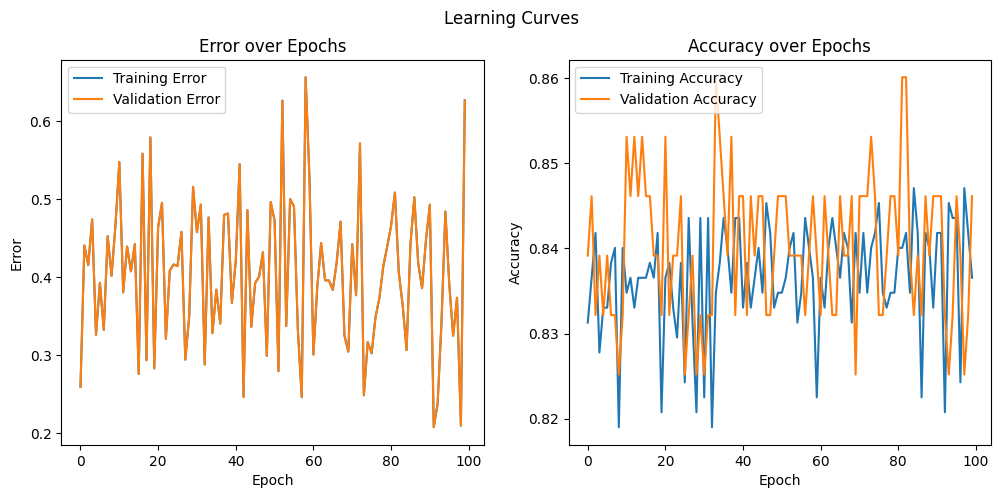

In [228]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), train_errors, label='Training Error')
plt.plot(range(epochs), val_errors, label='Validation Error')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Error over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(epochs), train_accuracies, label='Training Accuracy')
plt.plot(range(epochs), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.suptitle('Learning Curves')
plt.show()

Epoch 1/100: Train Error: 0.6646, Train Accuracy: 0.7733, Val Accuracy: 0.8042
Epoch 2/100: Train Error: 0.5869, Train Accuracy: 0.6344, Val Accuracy: 0.6154
Epoch 3/100: Train Error: 0.4771, Train Accuracy: 0.7821, Val Accuracy: 0.8322
Epoch 4/100: Train Error: 0.5174, Train Accuracy: 0.7803, Val Accuracy: 0.8182
Epoch 5/100: Train Error: 0.4529, Train Accuracy: 0.7803, Val Accuracy: 0.8182
Epoch 6/100: Train Error: 0.4114, Train Accuracy: 0.7803, Val Accuracy: 0.8182
Epoch 7/100: Train Error: 0.5268, Train Accuracy: 0.7803, Val Accuracy: 0.8182
Epoch 8/100: Train Error: 0.5186, Train Accuracy: 0.7803, Val Accuracy: 0.8182
Epoch 9/100: Train Error: 0.4749, Train Accuracy: 0.7803, Val Accuracy: 0.8182
Epoch 10/100: Train Error: 0.4742, Train Accuracy: 0.7856, Val Accuracy: 0.8182
Epoch 11/100: Train Error: 0.3544, Train Accuracy: 0.7891, Val Accuracy: 0.8182
Epoch 12/100: Train Error: 0.5741, Train Accuracy: 0.7891, Val Accuracy: 0.8182
Epoch 13/100: Train Error: 0.4691, Train Accuracy

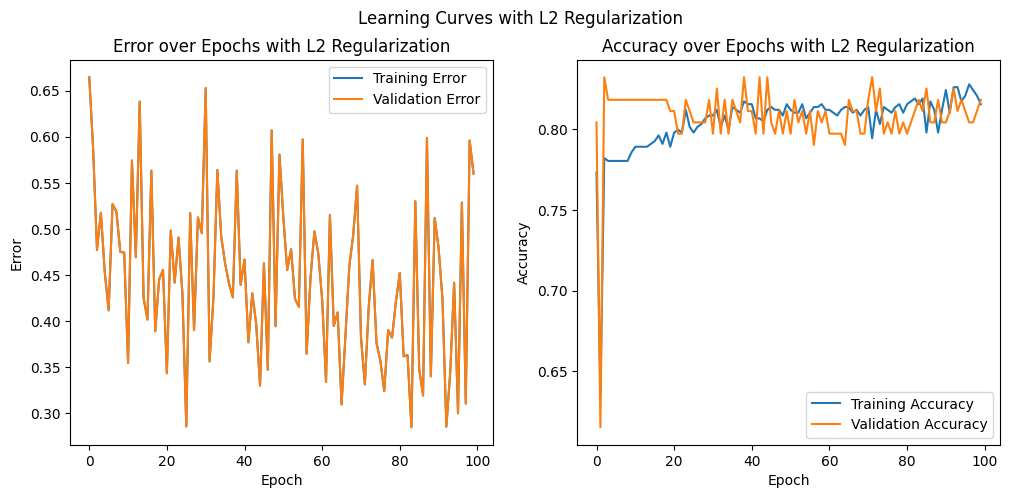

In [229]:
# Increase alpha for L2 regularization
titanic_clf = MLPClassifier(hidden_layer_sizes=(50,10),
                            activation='relu', solver='sgd',
                            alpha=0.001, batch_size=32, learning_rate='constant',
                            learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True, random_state=42,
                            tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                            early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999,
                            epsilon=1e-08, n_iter_no_change=10, max_fun=20000)

# Retrain the model with the increased alpha using the custom training loop
train_errors = []
train_accuracies = []
val_errors = []
val_accuracies = []

for epoch in range(epochs):
    # Shuffle data at the beginning of each epoch
    indices = np.random.permutation(len(X_train))
    X_train_shuffled = X_train.iloc[indices]
    y_train_shuffled = y_train.iloc[indices]

    for i in range(n_batches):
        batch_X = X_train_shuffled[i * batch_size:(i + 1) * batch_size]
        batch_y = y_train_shuffled[i * batch_size:(i + 1) * batch_size]
        titanic_clf.partial_fit(batch_X, batch_y, classes=np.unique(y_titanic_train))

    # Calculate metrics after each epoch
    y_train_pred = titanic_clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_loss = titanic_clf.loss_

    y_val_pred = titanic_clf.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)

    train_accuracies.append(train_accuracy)
    train_errors.append(train_loss)
    val_accuracies.append(val_accuracy)
    val_errors.append(train_loss) # Using training loss as a proxy for validation error

    print(f"Epoch {epoch+1}/{epochs}: Train Error: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Accuracy: {val_accuracy:.4f}")

# Replott the learning curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), train_errors, label='Training Error')
plt.plot(range(epochs), val_errors, label='Validation Error')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Error over Epochs with L2 Regularization')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(epochs), train_accuracies, label='Training Accuracy')
plt.plot(range(epochs), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs with L2 Regularization')
plt.legend()

plt.suptitle('Learning Curves with L2 Regularization')
plt.show()

In [230]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_titanic_test_pred = titanic_clf.predict(X_titanic_test)

precision_test = precision_score(y_titanic_test, y_titanic_test_pred)
recall_test = recall_score(y_titanic_test, y_titanic_test_pred)
f1_test = f1_score(y_titanic_test, y_titanic_test_pred)

print(f"Precision on Test Set: {precision_test:.4f}")
print(f"Recall on Test Set: {recall_test:.4f}")
print(f"F1 Score on Test Set: {f1_test:.4f}")

Precision on Test Set: 0.8621
Recall on Test Set: 0.6757
F1 Score on Test Set: 0.7576


# Boston

In [231]:
boston_df = pd.read_csv('/content/Boston-house-price-data(1).csv')
display(boston_df.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [232]:
display(boston_df.isnull().sum())
display(boston_df.info())
display(boston_df.describe())

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


None

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [233]:
X_boston = boston_df.drop('MEDV', axis=1)
y_boston = boston_df['MEDV']

display(X_boston.head())
display(y_boston.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [234]:
numerical_features_boston = X_boston.select_dtypes(include=np.number).columns.tolist()
categorical_features_boston = X_boston.select_dtypes(exclude=np.number).columns.tolist()

print("Numerical features:", numerical_features_boston)
print("Categorical features:", categorical_features_boston)

Numerical features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
Categorical features: []


In [235]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_boston[numerical_features_boston] = scaler.fit_transform(X_boston[numerical_features_boston])
display(X_boston.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [236]:
if categorical_features_boston:
    X_boston = pd.get_dummies(X_boston, columns=categorical_features_boston)
    print("One-hot encoding applied to categorical features.")
else:
    print("No categorical features to encode.")

display(X_boston.head())

No categorical features to encode.


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [237]:
from sklearn.model_selection import train_test_split

X_boston_train, X_boston_test, y_boston_train, y_boston_test = train_test_split(X_boston, y_boston, test_size=0.2, random_state=42)
display(X_boston_train.head())
display(X_boston_test.head())
display(y_boston_train.head())
display(y_boston_test.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,1.327804,-0.487722,1.015999,-0.272599,0.512296,-1.397069,1.021481,-0.805438,1.661245,1.530926,0.806576,-0.078878,1.718101
15,-0.347506,-0.487722,-0.437258,-0.272599,-0.144217,-0.642000,-0.429390,0.334449,-0.637962,-0.601276,1.176466,0.427018,-0.586356
332,-0.416484,1.014463,-0.740749,-0.272599,-1.008914,-0.361342,-1.610001,1.352738,-0.982843,-0.619094,-0.719220,0.061137,-0.676067
423,0.399963,-0.487722,1.015999,-0.272599,0.512296,-0.258767,0.587642,-0.842945,1.661245,1.530926,0.806576,-3.883072,1.491020
19,-0.336054,-0.487722,-0.437258,-0.272599,-0.144217,-0.794439,0.032897,0.000693,-0.637962,-0.601276,1.176466,0.375814,-0.192467


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,-0.409837,-0.487722,-1.034027,-0.272599,-0.386091,0.187151,0.552081,-0.546077,-0.523001,-0.666608,-0.857929,0.425702,-0.506457
274,-0.413949,1.229060,-0.689681,3.668398,-0.930305,0.674384,-1.268620,0.134319,-0.637962,-0.916058,-0.395567,0.441052,-1.278814
491,-0.408212,-0.487722,2.422565,-0.272599,0.469104,-0.429726,1.074822,-0.916009,-0.637962,1.798194,0.760340,0.366604,0.759313
72,-0.409853,-0.487722,-0.047680,-0.272599,-1.224009,-0.312904,-2.161190,0.709373,-0.637962,-0.613155,0.344213,0.375375,-0.999868
452,0.171842,-0.487722,1.015999,-0.272599,1.367490,0.017617,0.825898,-0.678277,1.661245,1.530926,0.806576,0.311563,0.647173


,MEDV
477,12.0
15,19.9
332,19.4
423,13.4
19,18.2


,MEDV
173,23.6
274,32.4
491,13.6
72,22.8
452,16.1


In [238]:
from sklearn.neural_network import MLPRegressor

boston_reg = MLPRegressor(hidden_layer_sizes=(100,), random_state=42, max_iter=1000)
boston_reg.fit(X_boston_train, y_boston_train)

MLPRegressor(max_iter=1000, random_state=42)

In [239]:
from sklearn.metrics import mean_squared_error, r2_score

y_boston_test_pred = boston_reg.predict(X_boston_test)

mse_test = mean_squared_error(y_boston_test, y_boston_test_pred)
r2_test = r2_score(y_boston_test, y_boston_test_pred)

print(f"Mean Squared Error on Test Set: {mse_test:.4f}")
print(f"R-squared Score on Test Set: {r2_test:.4f}")

Mean Squared Error on Test Set: 14.2982
R-squared Score on Test Set: 0.8050


# mpg

In [240]:
auto_mpg_df = pd.read_csv('/content/auto-mpg.csv')
display(auto_mpg_df.head())

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [241]:
display(auto_mpg_df.isnull().sum())
display(auto_mpg_df.info())
display(auto_mpg_df.describe())

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model year,0
origin,0
car name,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


None

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [242]:
auto_mpg_df['horsepower'] = pd.to_numeric(auto_mpg_df['horsepower'], errors='coerce')
display(auto_mpg_df.isnull().sum())
imputer = SimpleImputer(strategy='median')
auto_mpg_df['horsepower'] = imputer.fit_transform(auto_mpg_df[['horsepower']])
display(auto_mpg_df.isnull().sum())

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model year,0
origin,0
car name,0


,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model year,0
origin,0
car name,0


In [243]:
X_auto_mpg = auto_mpg_df.drop('mpg', axis=1)
y_auto_mpg = auto_mpg_df['mpg']
display(X_auto_mpg.head())
display(y_auto_mpg.head())

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,8,302.0,140.0,3449,10.5,70,1,ford torino


,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [244]:
numerical_features_auto_mpg = X_auto_mpg.select_dtypes(include=np.number).columns.tolist()
categorical_features_auto_mpg = X_auto_mpg.select_dtypes(exclude=np.number).columns.tolist()

print("Numerical features:", numerical_features_auto_mpg)
print("Categorical features:", categorical_features_auto_mpg)

Numerical features: ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']
Categorical features: ['car name']


In [245]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_auto_mpg[numerical_features_auto_mpg] = scaler.fit_transform(X_auto_mpg[numerical_features_auto_mpg])
display(X_auto_mpg.head())

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.715145,chevrolet chevelle malibu
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-0.715145,buick skylark 320
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.715145,plymouth satellite
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.715145,amc rebel sst
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.715145,ford torino


In [246]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
encoded_cat_features = encoder.fit_transform(X_auto_mpg[['car name']])
encoded_cat_df = pd.DataFrame(encoded_cat_features, columns=encoder.get_feature_names_out(['car name']))

X_auto_mpg = X_auto_mpg.drop('car name', axis=1)
X_auto_mpg = pd.concat([X_auto_mpg, encoded_cat_df], axis=1)

display(X_auto_mpg.head())

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name_amc ambassador brougham,car name_amc ambassador dpl,car name_amc ambassador sst,...,car name_volvo 145e (sw),car name_volvo 244dl,car name_volvo 245,car name_volvo 264gl,car name_volvo diesel,car name_vw dasher (diesel),car name_vw pickup,car name_vw rabbit,car name_vw rabbit c (diesel),car name_vw rabbit custom
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.715145,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-0.715145,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.715145,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.715145,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.715145,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [247]:
from sklearn.model_selection import train_test_split

X_auto_mpg_train, X_auto_mpg_test, y_auto_mpg_train, y_auto_mpg_test = train_test_split(X_auto_mpg, y_auto_mpg, test_size=0.2, random_state=42)
display(X_auto_mpg_train.head())
display(X_auto_mpg_test.head())
display(y_auto_mpg_train.head())
display(y_auto_mpg_test.head())

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name_amc ambassador brougham,car name_amc ambassador dpl,car name_amc ambassador sst,...,car name_volvo 145e (sw),car name_volvo 244dl,car name_volvo 245,car name_volvo 264gl,car name_volvo diesel,car name_vw dasher (diesel),car name_vw pickup,car name_vw rabbit,car name_vw rabbit c (diesel),car name_vw rabbit custom
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.715145,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,-0.856321,-0.925936,-0.427091,-0.993671,-0.387801,-1.627426,1.781589,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
376,-0.856321,-0.983552,-0.951000,-1.117818,0.955591,1.621983,1.781589,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
248,-0.856321,-0.983552,-1.160564,-1.383845,0.302049,0.538847,1.781589,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177,-0.856321,-0.753090,-0.243723,-0.326829,-0.206262,-0.273506,0.533222,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name_amc ambassador brougham,car name_amc ambassador dpl,car name_amc ambassador sst,...,car name_volvo 145e (sw),car name_volvo 244dl,car name_volvo 245,car name_volvo 264gl,car name_volvo diesel,car name_vw dasher (diesel),car name_vw pickup,car name_vw rabbit,car name_vw rabbit c (diesel),car name_vw rabbit custom
198,-0.856321,-0.983552,-1.343932,-1.389757,0.665128,-0.002721,1.781589,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396,-0.856321,-0.705077,-0.662850,-0.408411,1.100822,1.621983,-0.715145,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33,0.320935,0.370411,-0.112746,-0.397770,-0.932419,-1.356642,-0.715145,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
208,1.498191,1.196232,1.197027,1.146372,-0.859804,-0.002721,-0.715145,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93,1.498191,1.196232,1.197027,1.497528,-0.387801,-0.815074,-0.715145,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,mpg
3,16.0
18,27.0
376,37.0
248,36.1
177,23.0


,mpg
198,33.0
396,28.0
33,19.0
208,13.0
93,14.0


In [254]:
from sklearn.metrics import mean_squared_error, r2_score

epochs = 100
batch_size = 32
n_batches = len(X_auto_mpg_train) // batch_size

train_errors = []
val_errors = []
train_accuracies = []
val_accuracies = []

auto_mpg_reg = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam',
                            max_iter=1, warm_start=True, random_state=42, alpha=10) # Increased alpha for L2 regularization

for epoch in range(epochs):
    indices = np.random.permutation(len(X_auto_mpg_train))
    X_auto_mpg_train_shuffled = X_auto_mpg_train.iloc[indices]
    y_auto_mpg_train_shuffled = y_auto_mpg_train.iloc[indices]

    for i in range(n_batches):
        batch_X = X_auto_mpg_train_shuffled[i * batch_size:(i + 1) * batch_size]
        batch_y = y_auto_mpg_train_shuffled[i * batch_size:(i + 1) * batch_size]
        auto_mpg_reg.partial_fit(batch_X, batch_y)

    y_train_pred = auto_mpg_reg.predict(X_auto_mpg_train)
    train_loss = mean_squared_error(y_auto_mpg_train, y_train_pred)
    train_r2 = r2_score(y_auto_mpg_train, y_train_pred)
    train_errors.append(train_loss)
    train_accuracies.append(train_r2)

    y_val_pred = auto_mpg_reg.predict(X_auto_mpg_test)
    val_loss = mean_squared_error(y_auto_mpg_test, y_val_pred)
    val_r2 = r2_score(y_auto_mpg_test, y_val_pred)
    val_errors.append(val_loss)
    val_accuracies.append(val_r2)

    print(f"Epoch {epoch+1}/{epochs}: Train Error: {train_loss:.4f}, Train R2: {train_r2:.4f}, Val Error: {val_loss:.4f}, Val R2: {val_r2:.4f}")

Epoch 1/100: Train Error: 606.6591, Train R2: -8.6762, Val Error: 575.9074, Val R2: -9.7113
Epoch 2/100: Train Error: 594.3350, Train R2: -8.4796, Val Error: 564.3995, Val R2: -9.4972
Epoch 3/100: Train Error: 581.0808, Train R2: -8.2682, Val Error: 551.9369, Val R2: -9.2655
Epoch 4/100: Train Error: 566.4492, Train R2: -8.0348, Val Error: 538.2522, Val R2: -9.0109
Epoch 5/100: Train Error: 550.0072, Train R2: -7.7726, Val Error: 522.9963, Val R2: -8.7272
Epoch 6/100: Train Error: 531.7560, Train R2: -7.4815, Val Error: 506.1224, Val R2: -8.4134
Epoch 7/100: Train Error: 511.3889, Train R2: -7.1566, Val Error: 487.1880, Val R2: -8.0612
Epoch 8/100: Train Error: 489.3086, Train R2: -6.8044, Val Error: 466.6624, Val R2: -7.6794
Epoch 9/100: Train Error: 465.3419, Train R2: -6.4222, Val Error: 444.5651, Val R2: -7.2684
Epoch 10/100: Train Error: 439.2960, Train R2: -6.0067, Val Error: 420.5517, Val R2: -6.8218
Epoch 11/100: Train Error: 412.2644, Train R2: -5.5756, Val Error: 395.5935, Va

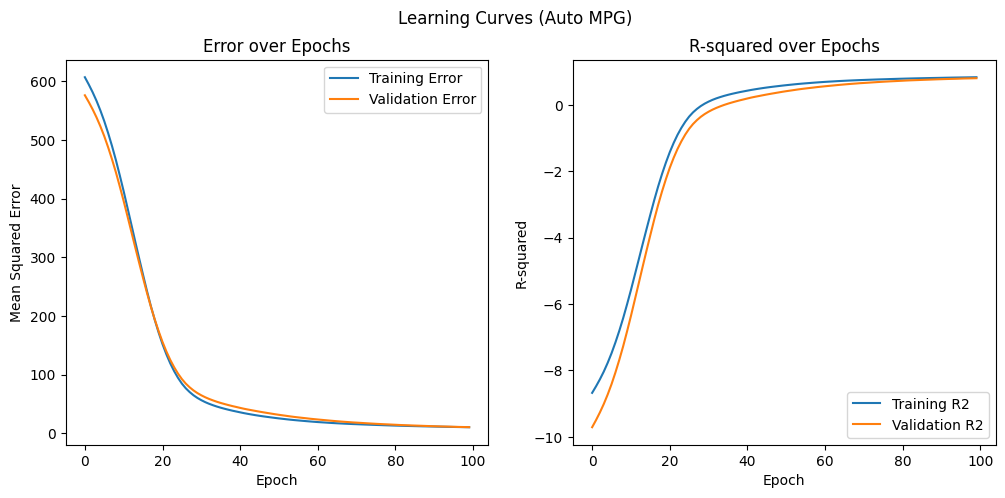

In [255]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), train_errors, label='Training Error')
plt.plot(range(epochs), val_errors, label='Validation Error')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Error over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(epochs), train_accuracies, label='Training R2')
plt.plot(range(epochs), val_accuracies, label='Validation R2')
plt.xlabel('Epoch')
plt.ylabel('R-squared')
plt.title('R-squared over Epochs')
plt.legend()

plt.suptitle('Learning Curves (Auto MPG)')
plt.show()

In [256]:
y_auto_mpg_test_pred = auto_mpg_reg.predict(X_auto_mpg_test)

mse_test = mean_squared_error(y_auto_mpg_test, y_auto_mpg_test_pred)
r2_test = r2_score(y_auto_mpg_test, y_auto_mpg_test_pred)

print(f"Mean Squared Error on Test Set: {mse_test:.4f}")
print(f"R-squared Score on Test Set: {r2_test:.4f}")

Mean Squared Error on Test Set: 10.5760
R-squared Score on Test Set: 0.8033
